# Objective
Predict whether there will be Recession ( Bad ) or Not ( Good )

Yes = Recession , No = not recession

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# 1. Data Importing

In [2]:
import pandas as pd
new = pd.read_csv (r"C:\Users\admin\Downloads\US-macroeconomic data 1996-2020\macrodata.csv")
new.head()

,Unnamed: 0,RPI,INDPRO,CE16OV,UNRATE,PAYEMS,USGOOD,USTPU,HOUST,PERMIT,...,EXUSUK,WPSFD49207,WPSID61,CPIAUCSL,SP500,NASDAQ,GOLDBAR,Regime,P/E,Dividend Yield
0,1996-01,8909.327,74.6841,125125,5.6,118316,23196,23947,1467,1387,...,1.5288,129.7,125.5,154.7,636.020020,1059.790039,20.754421,Normal,18.6845,2.26
1,1996-02,8983.863,75.8344,125639,5.5,118739,23280,23988,1491,1420,...,1.5360,129.7,125.0,155.0,640.429993,1100.050049,21.372637,Normal,18.8140,2.16
2,1996-03,9015.588,75.7631,125862,5.5,118993,23276,24030,1424,1437,...,1.5271,130.5,125.3,155.5,645.500000,1101.400024,21.460953,Normal,18.9630,2.18
3,1996-04,9039.466,76.4562,125994,5.6,119158,23316,24043,1516,1463,...,1.5160,130.9,125.7,156.1,654.169983,1190.520020,21.637589,Normal,18.7388,2.19
4,1996-05,9078.928,77.0161,126244,5.6,119486,23358,24137,1504,1457,...,1.5152,130.9,126.2,156.4,669.119995,1243.430054,22.255806,Normal,19.1670,2.15


# 2. Data Pre-Processing
Data Type and conversion

Identifying & Treatment Missing Value

# 2.1. Data Type and conversion

In [3]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       293 non-null    object 
 1   RPI              293 non-null    float64
 2   INDPRO           293 non-null    float64
 3   CE16OV           293 non-null    int64  
 4   UNRATE           293 non-null    float64
 5   PAYEMS           293 non-null    int64  
 6   USGOOD           293 non-null    int64  
 7   USTPU            293 non-null    int64  
 8   HOUST            293 non-null    int64  
 9   PERMIT           293 non-null    int64  
 10  DPCERA3M086SBEA  293 non-null    float64
 11  AMTMTI           293 non-null    int64  
 12  AMTMNO           293 non-null    int64  
 13  ACOGNO           293 non-null    int64  
 14  AMDMUO           293 non-null    int64  
 15  BUSINV           293 non-null    int64  
 16  ISRATIO          293 non-null    float64
 17  M1SL            

In [4]:
new = new.drop('Unnamed: 0',axis=1)

# 2.2. Identifying & Treatment Missing Value

In [5]:
# count the number of NaN values in each column
new.isnull().sum()

RPI                0
INDPRO             0
CE16OV             0
UNRATE             0
PAYEMS             0
USGOOD             0
USTPU              0
HOUST              0
PERMIT             0
DPCERA3M086SBEA    0
AMTMTI             0
AMTMNO             0
ACOGNO             0
AMDMUO             0
BUSINV             0
ISRATIO            0
M1SL               0
M2SL               0
TOTRESNS           0
BUSLOANS           0
REALLN             0
DTCTHFNM           0
FEDFUNDS           0
TB3MS              0
TB6MS              0
GS1                0
GS5                0
GS10               0
AAA                0
TB3SMFFM           0
T1YFFM             0
AAAFFM             0
EXSZUS             0
EXCAUS             0
EXUSUK             0
WPSFD49207         0
WPSID61            0
CPIAUCSL           0
SP500              0
NASDAQ             0
GOLDBAR            0
Regime             0
P/E                0
Dividend Yield     0
dtype: int64

In [6]:
new.head()

,RPI,INDPRO,CE16OV,UNRATE,PAYEMS,USGOOD,USTPU,HOUST,PERMIT,DPCERA3M086SBEA,...,EXUSUK,WPSFD49207,WPSID61,CPIAUCSL,SP500,NASDAQ,GOLDBAR,Regime,P/E,Dividend Yield
0,8909.327,74.6841,125125,5.6,118316,23196,23947,1467,1387,63.691,...,1.5288,129.7,125.5,154.7,636.020020,1059.790039,20.754421,Normal,18.6845,2.26
1,8983.863,75.8344,125639,5.5,118739,23280,23988,1491,1420,64.180,...,1.5360,129.7,125.0,155.0,640.429993,1100.050049,21.372637,Normal,18.8140,2.16
2,9015.588,75.7631,125862,5.5,118993,23276,24030,1424,1437,64.491,...,1.5271,130.5,125.3,155.5,645.500000,1101.400024,21.460953,Normal,18.9630,2.18
3,9039.466,76.4562,125994,5.6,119158,23316,24043,1516,1463,64.729,...,1.5160,130.9,125.7,156.1,654.169983,1190.520020,21.637589,Normal,18.7388,2.19
4,9078.928,77.0161,126244,5.6,119486,23358,24137,1504,1457,64.813,...,1.5152,130.9,126.2,156.4,669.119995,1243.430054,22.255806,Normal,19.1670,2.15


<AxesSubplot:>

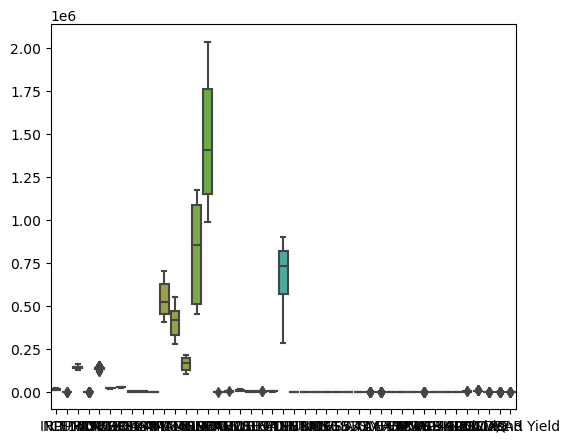

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,5))
sns.boxplot(data=new)

In [8]:
for i in new:
    if new[i].dtypes in ("float64","int64"):
        q1 = new[i].quantile(0.25)
        q3 = new[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        new[i].clip(upper=ul,lower=ll,inplace=True)

# Data Visualization

# Recession Analysis

In [9]:
new.Regime.value_counts()

Normal       263
Recession     30
Name: Regime, dtype: int64

In [10]:
(30/293)*100 # 10% is Recession

10.238907849829351

In [11]:
import plotly.express as px

fig = px.pie(new,names='Regime',color='Regime',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

# 5. Breaking Data into Two Part
Quantitative Variable 

Qualitative Variable

In [12]:
new.select_dtypes(include=[np.number]).columns.tolist()

['RPI',
 'INDPRO',
 'CE16OV',
 'UNRATE',
 'PAYEMS',
 'USGOOD',
 'USTPU',
 'HOUST',
 'PERMIT',
 'DPCERA3M086SBEA',
 'AMTMTI',
 'AMTMNO',
 'ACOGNO',
 'AMDMUO',
 'BUSINV',
 'ISRATIO',
 'M1SL',
 'M2SL',
 'TOTRESNS',
 'BUSLOANS',
 'REALLN',
 'DTCTHFNM',
 'FEDFUNDS',
 'TB3MS',
 'TB6MS',
 'GS1',
 'GS5',
 'GS10',
 'AAA',
 'TB3SMFFM',
 'T1YFFM',
 'AAAFFM',
 'EXSZUS',
 'EXCAUS',
 'EXUSUK',
 'WPSFD49207',
 'WPSID61',
 'CPIAUCSL',
 'SP500',
 'NASDAQ',
 'GOLDBAR',
 'P/E',
 'Dividend Yield']

In [13]:
# Qualitative Variable
Quantitative_Variable = new[new.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,RPI,INDPRO,CE16OV,UNRATE,PAYEMS,USGOOD,USTPU,HOUST,PERMIT,DPCERA3M086SBEA,...,EXCAUS,EXUSUK,WPSFD49207,WPSID61,CPIAUCSL,SP500,NASDAQ,GOLDBAR,P/E,Dividend Yield
0,8909.327,76.77265,125125,5.6,118964.0,23196,23947,1467,1387,63.691,...,1.3669,1.5288,129.7,125.5,154.7,636.020020,1059.790039,20.754421,18.6845,2.26
1,8983.863,76.77265,125639,5.5,118964.0,23280,23988,1491,1420,64.180,...,1.3752,1.5360,129.7,125.0,155.0,640.429993,1100.050049,21.372637,18.8140,2.16
2,9015.588,76.77265,125862,5.5,118993.0,23276,24030,1424,1437,64.491,...,1.3656,1.5271,130.5,125.3,155.5,645.500000,1101.400024,21.460953,18.9630,2.18


In [14]:
abc = Quantitative_Variable.loc[:,['PAYEMS', 'DPCERA3M086SBEA', 'M2SL', 'BUSLOANS', 'P/E']]
abc.head()

,PAYEMS,DPCERA3M086SBEA,M2SL,BUSLOANS,P/E
0,118964.0,63.691,3647.9,721.8115,18.6845
1,118964.0,64.180,3661.8,724.1690,18.8140
2,118993.0,64.491,3687.0,727.3465,18.9630
3,119158.0,64.729,3697.8,732.0780,18.7388
4,119486.0,64.813,3709.6,736.4489,19.1670


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
series_before = pd.Series([variance_inflation_factor(abc.values, i) 
                           for i in range(abc.shape[1])],  # i=0,1,2
                          index=abc.columns)  # column name
series_before

PAYEMS             504.428893
DPCERA3M086SBEA    826.198062
M2SL               328.951812
BUSLOANS           222.399576
P/E                 22.083875
dtype: float64

In [16]:
Qualitative_Variable = new[new.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,Regime
0,Normal
1,Normal
2,Normal


# Converting qualitative Variable into number

In [17]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,Regime
0,0
1,0
2,0
3,0
4,0


# Combining the data set

In [18]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,Regime,RPI,INDPRO,CE16OV,UNRATE,PAYEMS,USGOOD,USTPU,HOUST,PERMIT,...,EXCAUS,EXUSUK,WPSFD49207,WPSID61,CPIAUCSL,SP500,NASDAQ,GOLDBAR,P/E,Dividend Yield
0,0,8909.327,76.77265,125125,5.6,118964.0,23196,23947,1467,1387,...,1.3669,1.5288,129.7,125.5,154.7,636.020020,1059.790039,20.754421,18.6845,2.26
1,0,8983.863,76.77265,125639,5.5,118964.0,23280,23988,1491,1420,...,1.3752,1.5360,129.7,125.0,155.0,640.429993,1100.050049,21.372637,18.8140,2.16
2,0,9015.588,76.77265,125862,5.5,118993.0,23276,24030,1424,1437,...,1.3656,1.5271,130.5,125.3,155.5,645.500000,1101.400024,21.460953,18.9630,2.18
3,0,9039.466,76.77265,125994,5.6,119158.0,23316,24043,1516,1463,...,1.3592,1.5160,130.9,125.7,156.1,654.169983,1190.520020,21.637589,18.7388,2.19
4,0,9078.928,77.01610,126244,5.6,119486.0,23358,24137,1504,1457,...,1.3693,1.5152,130.9,126.2,156.4,669.119995,1243.430054,22.255806,19.1670,2.15


# Data Partition

In [19]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('Regime', axis = 1)
Y = Final_combined[['Regime']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

# Model building

# Hypothesis
H0 :- There is no log linear relationship between Regime and all independent Variable Vs

H1 :- There is log linear relationship between Regime and all independent Variable Alpha = 0.05 (5%)

# Variable selection

In [20]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
Model3 = sfs(logreg, n_features_to_select=5, direction='forward', scoring='accuracy',cv=5)
Model3.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=5, scoring='accuracy')

In [21]:
Model3.feature_names_in_

array(['RPI', 'INDPRO', 'CE16OV', 'UNRATE', 'PAYEMS', 'USGOOD', 'USTPU',
       'HOUST', 'PERMIT', 'DPCERA3M086SBEA', 'AMTMTI', 'AMTMNO', 'ACOGNO',
       'AMDMUO', 'BUSINV', 'ISRATIO', 'M1SL', 'M2SL', 'TOTRESNS',
       'BUSLOANS', 'REALLN', 'DTCTHFNM', 'FEDFUNDS', 'TB3MS', 'TB6MS',
       'GS1', 'GS5', 'GS10', 'AAA', 'TB3SMFFM', 'T1YFFM', 'AAAFFM',
       'EXSZUS', 'EXCAUS', 'EXUSUK', 'WPSFD49207', 'WPSID61', 'CPIAUCSL',
       'SP500', 'NASDAQ', 'GOLDBAR', 'P/E', 'Dividend Yield'],
      dtype=object)

In [22]:
Model3.get_feature_names_out()

array(['PAYEMS', 'DPCERA3M086SBEA', 'M2SL', 'BUSLOANS', 'P/E'],
      dtype=object)

# Logistics Regression

X_train1 = X_train.iloc[:,[5,10,18,20,43]]
X_train1.head()

In [ ]:
logreg = LogisticRegression()
output=logreg.fit(X_train1, y_train) # model = output

In [ ]:
output.intercept_  # beto 

In [ ]:
output.coef_  # Beta 1 -- 

In [ ]:
output.feature_names_in_

# Step 6 : Predictions on Train Dataset

In [ ]:
train=pd.concat([X_train1,y_train],axis=1)
train.head()

In [ ]:
train['Probability']=output.predict_proba(X_train1)[:,1]
train.head()

In [ ]:
train['Predicted']=np.where(train['Probability'] >= 0.7,1,0) 
train.head()

# Step 7 : Model Performance Metrics

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train['Regime'],train['Predicted']))

In [ ]:
from  sklearn.metrics import log_loss

In [ ]:
log_loss(y_train,train['Predicted'])

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Regime'], train['Predicted'])
matrix

In [ ]:
Accuracy_Train=((213)/(234)*100)
print(Accuracy_Train)

# Acccuracy of model is 91% so model is good fit

# Step 8 : Predictions on Test Dataset

In [ ]:
X_test1 = X_test.iloc[:,[5,10,18,20,43]]
X_test1.head()

In [ ]:
test=pd.concat([X_test1,y_test],axis=1)
test.head()

In [ ]:
test['Probability']=output.predict_proba(X_test1)[:,1]
test.head()

In [ ]:
test['Predicted']=np.where(test['Probability'] >= 0.8,1,0) 
test.head()

# Step 9 : Model Performance Metrics on Test data

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test['Regime'],test['Predicted']))

In [ ]:
from  sklearn.metrics import log_loss

In [ ]:
log_loss(y_test,test['Predicted'])

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Regime'],test['Predicted'])
print(matrix)

In [ ]:
Accuracy_test=((57)/(59)*100)
Accuracy_test

# Business Submission

# Coefficient
For future Prediction below 4 variable data is mandatory

Note :- If anyone is not present output will not be reliable

In [ ]:
Model_Values=pd.DataFrame(output.intercept_,index=['Intercept'],columns=['Coefficient'])
Model_Values

In [ ]:
abc=pd.DataFrame(output.coef_.T,index=output.feature_names_in_,columns=['Coefficient'])
abc


In [ ]:
Model_Values.append(abc)

# Step 10 :- ROCR Plot

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train, output.predict(X_train1))
fpr, tpr, thresholds= roc_curve(y_train, output.predict_proba(X_train1)
                                 [:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'
         % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# Finish

# Live Data

In [ ]:
# Load the test data
Recession_test = pd.read_excel(r"C:\Users\admin\Desktop\Data folder\Recession\Recession-New.xlsx")
print('Test Data Shape  - ', Recession_test.shape)
Recession_test.head()

# Handle missing values on the Live data

In [ ]:
Recession_test.isnull().sum()

In [ ]:
for column in ['Dividend Yield','DATE','RPI','INDPRO','CE16OV','UNRATE','PAYEMS','USGOOD','USTPU','HOUST','PERMIT', 'DPCERA3M086SBEA','Regime','GOLDBAR', 'NASDAQCOM' ]: 
    Recession_test[column].fillna(Recession_test[column].mode(), inplace=True)

In [ ]:
Recession_test.isnull().sum()

In [ ]:
AMTMTI

# Converting to Dummies

# Extreme Boosting

In [37]:
################  Data Analysis & Calculation  #####################3
import numpy as np   
import pandas as pd  
import datetime  

####################  Visuvalization & plotting  #####################3
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  
#################### Machine Learning #####################3
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier # Extrame GB
from xgboost import plot_importance ## Plotting Importance Variables 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder # Labeling the columns with 0 & 1

In [24]:
print ("Rows     : " ,new.shape[0])
print ("Columns  : " ,new.shape[1])

Rows     :  293
Columns  :  44


In [25]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RPI              293 non-null    float64
 1   INDPRO           293 non-null    float64
 2   CE16OV           293 non-null    int64  
 3   UNRATE           293 non-null    float64
 4   PAYEMS           293 non-null    float64
 5   USGOOD           293 non-null    int64  
 6   USTPU            293 non-null    int64  
 7   HOUST            293 non-null    int64  
 8   PERMIT           293 non-null    int64  
 9   DPCERA3M086SBEA  293 non-null    float64
 10  AMTMTI           293 non-null    int64  
 11  AMTMNO           293 non-null    int64  
 12  ACOGNO           293 non-null    int64  
 13  AMDMUO           293 non-null    int64  
 14  BUSINV           293 non-null    int64  
 15  ISRATIO          293 non-null    float64
 16  M1SL             293 non-null    float64
 17  M2SL            

# Missing Value

In [26]:
new.isnull().sum()

RPI                0
INDPRO             0
CE16OV             0
UNRATE             0
PAYEMS             0
USGOOD             0
USTPU              0
HOUST              0
PERMIT             0
DPCERA3M086SBEA    0
AMTMTI             0
AMTMNO             0
ACOGNO             0
AMDMUO             0
BUSINV             0
ISRATIO            0
M1SL               0
M2SL               0
TOTRESNS           0
BUSLOANS           0
REALLN             0
DTCTHFNM           0
FEDFUNDS           0
TB3MS              0
TB6MS              0
GS1                0
GS5                0
GS10               0
AAA                0
TB3SMFFM           0
T1YFFM             0
AAAFFM             0
EXSZUS             0
EXCAUS             0
EXUSUK             0
WPSFD49207         0
WPSID61            0
CPIAUCSL           0
SP500              0
NASDAQ             0
GOLDBAR            0
Regime             0
P/E                0
Dividend Yield     0
dtype: int64

In [27]:
# #Employee Numeric columns
new_num = new[new.select_dtypes(include=[np.number]).columns.tolist()]
new_num.head(3)

,RPI,INDPRO,CE16OV,UNRATE,PAYEMS,USGOOD,USTPU,HOUST,PERMIT,DPCERA3M086SBEA,...,EXCAUS,EXUSUK,WPSFD49207,WPSID61,CPIAUCSL,SP500,NASDAQ,GOLDBAR,P/E,Dividend Yield
0,8909.327,76.77265,125125,5.6,118964.0,23196,23947,1467,1387,63.691,...,1.3669,1.5288,129.7,125.5,154.7,636.020020,1059.790039,20.754421,18.6845,2.26
1,8983.863,76.77265,125639,5.5,118964.0,23280,23988,1491,1420,64.180,...,1.3752,1.5360,129.7,125.0,155.0,640.429993,1100.050049,21.372637,18.8140,2.16
2,9015.588,76.77265,125862,5.5,118993.0,23276,24030,1424,1437,64.491,...,1.3656,1.5271,130.5,125.3,155.5,645.500000,1101.400024,21.460953,18.9630,2.18


In [28]:
new_dummies = new[new.select_dtypes(include=['object']).columns.tolist()]
new_dummies.head(3)

,Regime
0,Normal
1,Normal
2,Normal


In [29]:
from sklearn.preprocessing import LabelEncoder
new_dummies=new_dummies.apply(LabelEncoder().fit_transform)
new_dummies.head(3)
# label in ascending order

,Regime
0,0
1,0
2,0


In [30]:
new_combined = pd.concat([new_num, new_dummies],axis=1)
new_combined.head()

,RPI,INDPRO,CE16OV,UNRATE,PAYEMS,USGOOD,USTPU,HOUST,PERMIT,DPCERA3M086SBEA,...,EXUSUK,WPSFD49207,WPSID61,CPIAUCSL,SP500,NASDAQ,GOLDBAR,P/E,Dividend Yield,Regime
0,8909.327,76.77265,125125,5.6,118964.0,23196,23947,1467,1387,63.691,...,1.5288,129.7,125.5,154.7,636.020020,1059.790039,20.754421,18.6845,2.26,0
1,8983.863,76.77265,125639,5.5,118964.0,23280,23988,1491,1420,64.180,...,1.5360,129.7,125.0,155.0,640.429993,1100.050049,21.372637,18.8140,2.16,0
2,9015.588,76.77265,125862,5.5,118993.0,23276,24030,1424,1437,64.491,...,1.5271,130.5,125.3,155.5,645.500000,1101.400024,21.460953,18.9630,2.18,0
3,9039.466,76.77265,125994,5.6,119158.0,23316,24043,1516,1463,64.729,...,1.5160,130.9,125.7,156.1,654.169983,1190.520020,21.637589,18.7388,2.19,0
4,9078.928,77.01610,126244,5.6,119486.0,23358,24137,1504,1457,64.813,...,1.5152,130.9,126.2,156.4,669.119995,1243.430054,22.255806,19.1670,2.15,0


# Data Partition-1

In [31]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
X = new_combined.drop('Regime',axis=1)
y = new_combined[["Regime"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [32]:
print('The number of samples into the Train data is {}.'.format(x_train.shape[0]))
print('The number of samples into the Test data is {}.'.format(x_test.shape[0]))

The number of samples into the Train data is 234.
The number of samples into the Test data is 59.


# Model -- Xg Boosting

In [33]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [10, 50], # number of tress
                    'max_depth':    [3, 5],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'reg_lambda':[0,1]} #parent 

In [38]:
# Gridsearch the parameters to find the best parameters. Using L2 penalty
model = XGBClassifier()   # Lamda = 0 
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(x_train, y_train)  ## Model building

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [39]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'learning_rate': 0.8, 'max_depth': 3, 'n_estimators': 10, 'reg_lambda': 0}


In [40]:
# Re-fit the model with the best parameters
final_mod = XGBClassifier(**gscv.best_params_)
final_mod.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.8, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [41]:
parent_node = {'shape':'box',
               'style':'filled,rounded',
                'fillcolor' :'#78cbec'}
child_node = {'shape':'box',
               'style':'filled',
                'fillcolor' :'#e48038'}

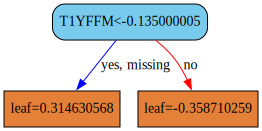

In [42]:
xgb.to_graphviz(final_mod,num_trees=9,size="5,5",   # Tree = 10 
               condition_node_params=parent_node,
               leaf_node_params=child_node)

# Accuracy of Train

In [43]:
train=pd.concat([x_train,y_train],axis=1)
train['Predicted']=final_mod.predict(x_train)  # MODEL = Final_mod
train.head()

,RPI,INDPRO,CE16OV,UNRATE,PAYEMS,USGOOD,USTPU,HOUST,PERMIT,DPCERA3M086SBEA,...,WPSFD49207,WPSID61,CPIAUCSL,SP500,NASDAQ,GOLDBAR,P/E,Dividend Yield,Regime,Predicted
139,13165.169,105.1611,146244,4.7,138095.0,22093,26587,1183,1261,96.865,...,167.6,171.4,208.547,1526.750000,2701.500000,33.197205,19.4243,1.80,0,0
249,15633.110,102.0507,152063,4.7,145212.0,19808,27284,1150,1236,112.347,...,193.2,184.5,241.993,2198.810059,5323.680176,14.347548,23.2555,2.10,0,0
70,11293.592,90.4860,136238,5.5,131142.0,23209,25655,1602,1651,81.503,...,138.5,127.0,177.500,1139.449951,1930.579956,11.501532,39.4725,1.39,0,0
278,16840.839,108.9888,156696,3.6,149940.0,21039,27671,1267,1330,119.721,...,206.7,200.5,254.943,2945.830078,8095.390137,12.462582,21.7774,1.90,0,0
201,14249.192,100.5991,143333,7.7,134833.0,18477,25545,833,917,100.574,...,195.7,200.6,231.249,1416.180054,3010.239990,30.777353,16.3701,2.20,0,0


In [44]:
print('Classification report for train data is : \n',
      classification_report(y_train, train['Predicted']))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00        23

    accuracy                           1.00       234
   macro avg       1.00      1.00      1.00       234
weighted avg       1.00      1.00      1.00       234



# Accuracy of Test

In [45]:
test=pd.concat([x_test,y_test],axis=1)
test['Predicted']=final_mod.predict(x_test)  # MODEL = Final_mod
test.head()

,RPI,INDPRO,CE16OV,UNRATE,PAYEMS,USGOOD,USTPU,HOUST,PERMIT,DPCERA3M086SBEA,...,WPSFD49207,WPSID61,CPIAUCSL,SP500,NASDAQ,GOLDBAR,P/E,Dividend Yield,Regime,Predicted
132,13096.338,103.5264,146057,4.5,137558.0,22334,26466,1480,1598,95.957,...,162.7,165.3,204.226,1406.819946,2416.149902,24.489918,16.9191,1.75,0,0
268,16468.096,108.1707,155750,4.0,148888.0,20698,27589,1190,1317,117.397,...,204.3,202.0,251.176,2718.370117,7510.299805,12.732822,22.1944,1.85,0,0
171,13107.196,94.2997,139241,8.9,130650.0,17742,24526,583,575,96.355,...,178.9,183.4,217.290,1089.410034,2257.040039,36.007793,16.2356,1.95,0,0
62,11349.539,93.7201,137783,4.3,132747.0,24409,26158,1590,1659,79.897,...,141.2,131.0,176.100,1160.329956,1840.260010,10.794967,25.5354,1.35,1,1
110,12122.341,99.4734,141254,5.2,133518.0,22136,25818,2061,2150,91.062,...,154.2,151.3,193.700,1156.849976,1921.650024,17.853090,18.2584,1.76,0,0


In [46]:
print('Classification report for test data is : \n',
      classification_report(y_test, test['Predicted']))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.86      0.92         7

    accuracy                           0.98        59
   macro avg       0.99      0.93      0.96        59
weighted avg       0.98      0.98      0.98        59



# Finished

# Importance Feature

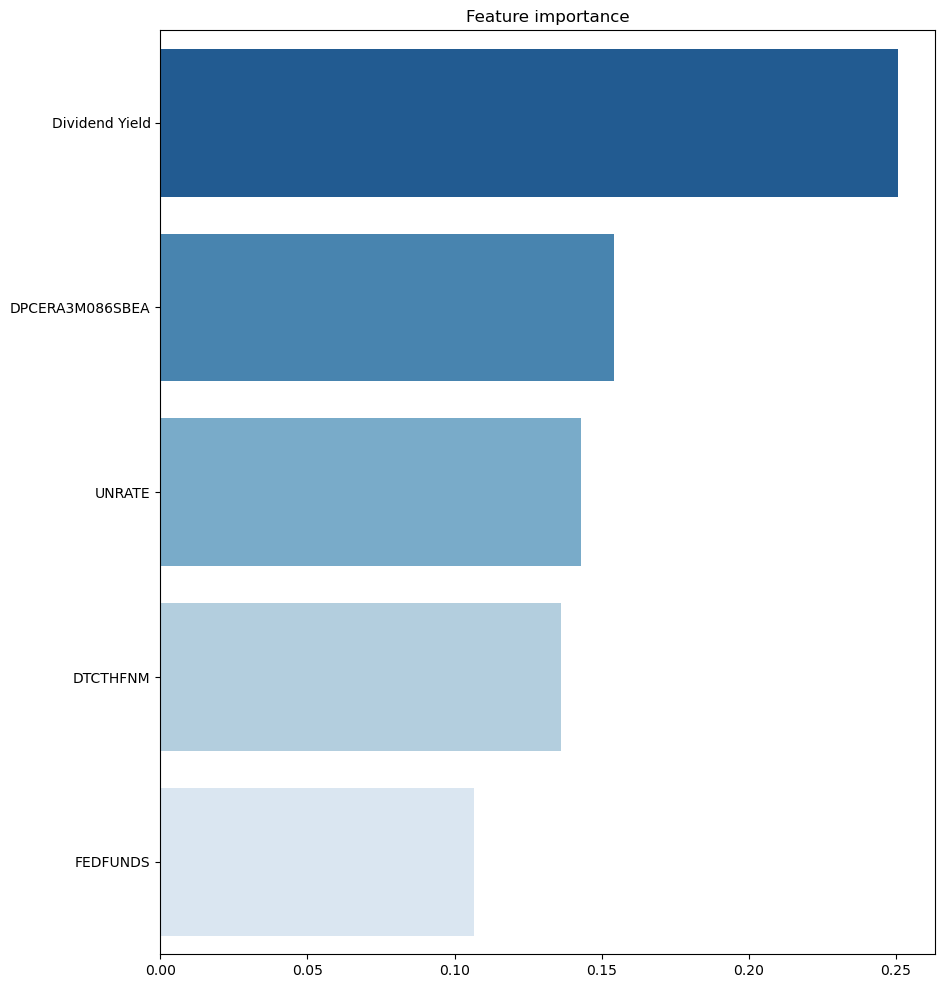

In [47]:
# Plot features importances
imp = pd.Series(data=final_mod.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')